In [32]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import torch
from kan import KAN
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

DATA

In [33]:
data = pd.read_csv("/home/sonn/Son/Workspace/KANTutorial/data/Admission_Predict_Ver1.1.csv")
data.head(2)

,GREScore,TOEFLScore,University Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [34]:
y = data['Chance']

In [35]:
X = data.drop('Chance', axis=1)

In [36]:
X.head(2)

,GREScore,TOEFLScore,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [37]:
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size=0.5, random_state=0)

In [39]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((375, 7), (63, 7), (62, 7), (375,), (63,), (62,))

In [40]:
train_input = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy()[:, None], dtype=torch.float32)
val_input = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
val_label = torch.tensor(y_val.to_numpy()[:, None], dtype=torch.float32)
test_input = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy()[:, None], dtype=torch.float32)

In [41]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'val_input': val_input,
    'val_label': val_label,
    'test_input': test_input,
    'test_label': test_label
}

In [42]:
X_train.shape[1]

7

KAN

In [43]:
model = KAN(width=[X_train.shape[1],3,1], grid=5, k=10)

In [44]:
results = model.train({'train_input': train_input, 'train_label': train_label, 'test_input': val_input, 'test_label': val_label},
                      opt="LBFGS", steps=50, loss_fn=torch.nn.MSELoss()) 

train loss: 5.98e-02 | test loss: 5.61e-02 | reg: 2.41e+01 : 100%|██| 50/50 [00:18<00:00,  2.69it/s]


In [45]:
test_preds = model.forward(test_input).detach()
test_labels = test_label

In [51]:
print("Test R2 Score:", r2_score(test_labels.numpy(), test_preds.numpy()))
print("Test MAE:", mean_absolute_error(test_labels.numpy(), test_preds.numpy()))

Test R2 Score: 0.7286965847015381
Test MAE: 0.05023655


In [52]:
test_preds

tensor([[0.5199],
        [0.6369],
        [0.7243],
        [0.8286],
        [0.9421],
        [0.6096],
        [0.7026],
        [0.7289],
        [0.7288],
        [0.5971],
        [0.6164],
        [0.7978],
        [0.5375],
        [0.6355],
        [0.8093],
        [0.7812],
        [0.6127],
        [0.7665],
        [0.5165],
        [0.8054],
        [0.5206],
        [0.7899],
        [0.7126],
        [0.9024],
        [0.8146],
        [0.7459],
        [0.8469],
        [0.7607],
        [0.8326],
        [0.9123],
        [0.7017],
        [0.8855],
        [0.6180],
        [0.4805],
        [0.6105],
        [0.5785],
        [0.8642],
        [0.7388],
        [0.5228],
        [0.6355],
        [0.8268],
        [0.6297],
        [0.7103],
        [0.6321],
        [0.5256],
        [0.5199],
        [0.5062],
        [0.7816],
        [0.6016],
        [0.7148],
        [0.6657],
        [0.6293],
        [0.8510],
        [0.7405],
        [0.5474],
        [0

In [53]:
test_labels

tensor([[0.5200],
        [0.6900],
        [0.7500],
        [0.8800],
        [0.9200],
        [0.4800],
        [0.7100],
        [0.7600],
        [0.6500],
        [0.6800],
        [0.6500],
        [0.5500],
        [0.5300],
        [0.6000],
        [0.7700],
        [0.8000],
        [0.6400],
        [0.8000],
        [0.6000],
        [0.7600],
        [0.6900],
        [0.7800],
        [0.7300],
        [0.8900],
        [0.8100],
        [0.6900],
        [0.8600],
        [0.7900],
        [0.8700],
        [0.9100],
        [0.7000],
        [0.9300],
        [0.5300],
        [0.4400],
        [0.4900],
        [0.5400],
        [0.9100],
        [0.5200],
        [0.5400],
        [0.5800],
        [0.7900],
        [0.7300],
        [0.7100],
        [0.6800],
        [0.3800],
        [0.5400],
        [0.5700],
        [0.8000],
        [0.5900],
        [0.7400],
        [0.7000],
        [0.7300],
        [0.8500],
        [0.7200],
        [0.6400],
        [0

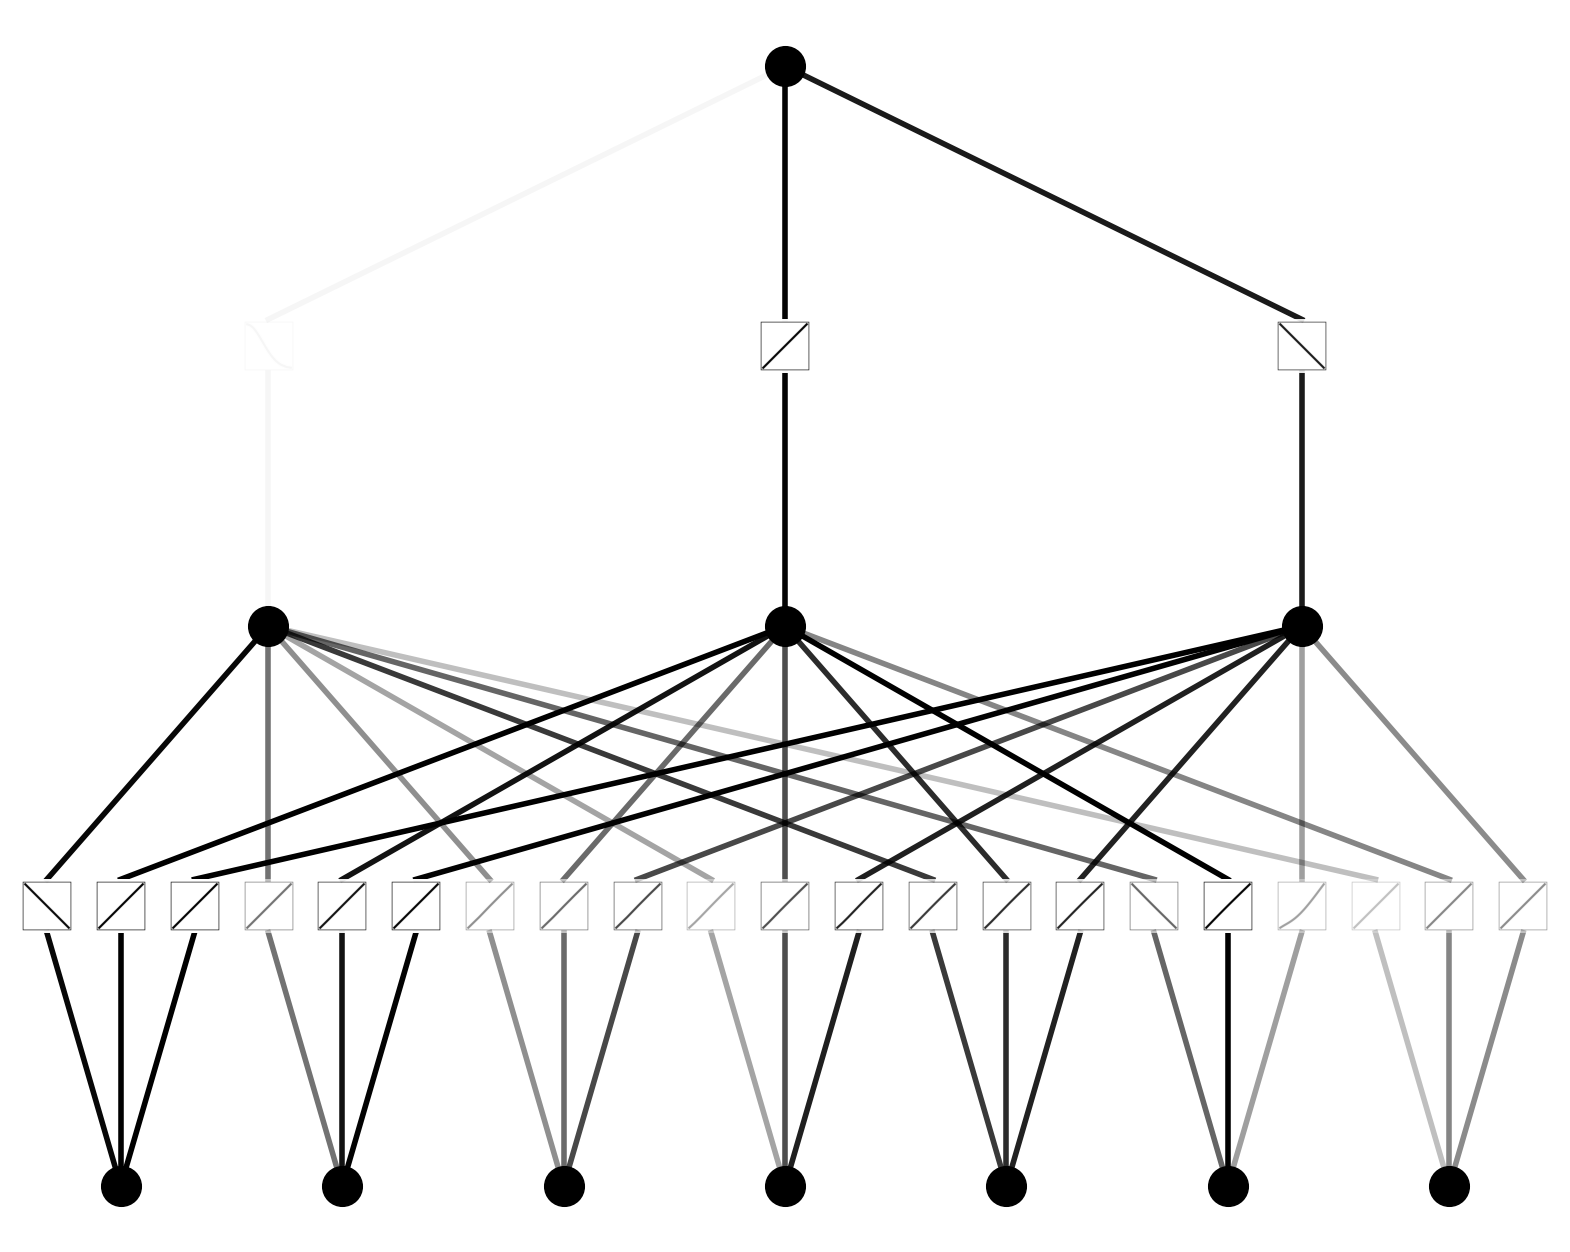

In [55]:
model.plot(scale=2)

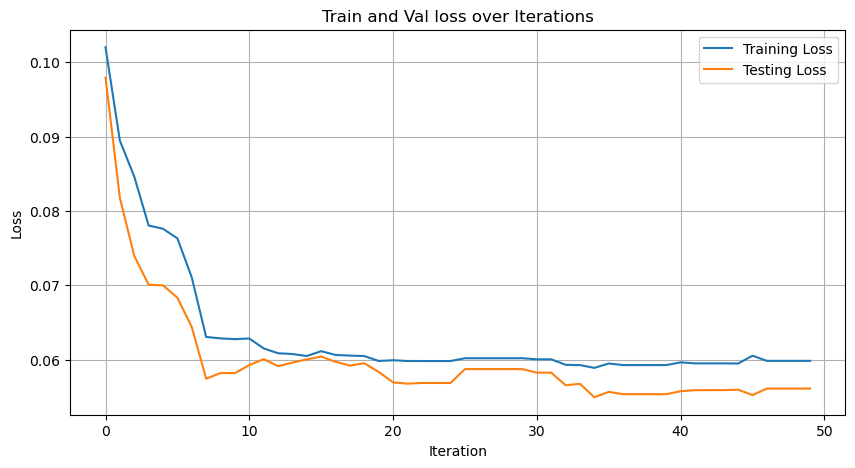

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(results["train_loss"], label='Training Loss')
plt.plot(results["test_loss"], label='Testing Loss')
plt.title('Train and Val loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Symbolic Regression

In [57]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with abs, r2=1.0000001192092896
fixing (0,0,1) with exp, r2=0.999999463558197
fixing (0,0,2) with abs, r2=1.000000238418579
fixing (0,1,0) with abs, r2=0.9999997019767761
fixing (0,1,1) with exp, r2=0.9999961853027344
fixing (0,1,2) with abs, r2=0.9999998211860657
fixing (0,2,0) with sin, r2=0.9999688863754272
fixing (0,2,1) with sin, r2=0.9999861717224121
fixing (0,2,2) with tanh, r2=0.9999757409095764
fixing (0,3,0) with sin, r2=0.9999484419822693
fixing (0,3,1) with exp, r2=0.9999841451644897
fixing (0,3,2) with tanh, r2=0.999973714351654
fixing (0,4,0) with sin, r2=0.9999895691871643
fixing (0,4,1) with sin, r2=0.9999880194664001
fixing (0,4,2) with x^2, r2=0.9999961853027344
fixing (0,5,0) with exp, r2=0.9999995231628418
fixing (0,5,1) with exp, r2=0.9999976754188538
fixing (0,5,2) with x^2, r2=0.9995517134666443
fixing (0,6,0) with exp, r2=1.0000008344650269
fixing (0,6,1) with x^4, r2=1.0000007152557373
fixing (0,6,2) with abs, r2=1.0000007152557373
fixing (1,0,0)

In [61]:
model.symbolic_formula()[0][0]

-372.04*exp(0.01*exp(-0.04*x_6) + 0.01*exp(-0.02*x_4)) + 0.06*sin(0.96*sin(0.2*x_3 - 10.0) + 0.74*sin(0.2*x_4 - 10.0) + 2.36*sin(0.16*x_5 + 2.75) + 0.01*Abs(9.31*x_1 + 9.58) + 10.99 - 3.79*exp(-0.02*x_6)) - 0.01*Abs(-114.67*(0.02*x_5 - 1)**2 + 2.52*(0.16*x_6 - 1)**2 + 21.74*tanh(0.16*x_3 - 0.46) + 31.82*tanh(0.16*x_4 - 0.46) + 0.53*Abs(8.06*x_1 + 9.97) + 0.2*Abs(8.73*x_2 + 3.0) + 0.32*Abs(9.67*x_7 - 0.41) + 143.86) + 378.95

In [63]:
formula = sp.sympify(str(model.symbolic_formula()[0][0]))
formula

-372.04*exp(0.01*exp(-0.04*x_6) + 0.01*exp(-0.02*x_4)) + 0.06*sin(0.96*sin(0.2*x_3 - 10.0) + 0.74*sin(0.2*x_4 - 10.0) + 2.36*sin(0.16*x_5 + 2.75) + 0.01*Abs(9.31*x_1 + 9.58) + 10.99 - 3.79*exp(-0.02*x_6)) - 0.01*Abs(-114.67*(0.02*x_5 - 1)**2 + 2.52*(0.16*x_6 - 1)**2 + 21.74*tanh(0.16*x_3 - 0.46) + 31.82*tanh(0.16*x_4 - 0.46) + 0.53*Abs(8.06*x_1 + 9.97) + 0.2*Abs(8.73*x_2 + 3.0) + 0.32*Abs(9.67*x_7 - 0.41) + 143.86) + 378.95

In [64]:
def kan_symbolic_formula_prediction(formula, X):
    batch = X.shape[0]
    predictions = [] 

    for i in range(batch):
        
        expression = formula
        for j in range(X.shape[1]):
            expression = expression.subs(f'x_{j+1}', X[i, j])
        
        
        predicted = float(expression.evalf())
        
        predictions.append(predicted)
    
    return predictions

In [65]:
preds_from_kan_formula = kan_symbolic_formula_prediction(formula, X_train.to_numpy())